Import Necessary Libraries

In [29]:
import pandas as pd
import os

Task #1: Merge the 12 months of sales data into a single CSV file

In [30]:
df = pd.read_csv("./Sales_Data/Sales_April_2022.csv")

files = [ file for file in os.listdir('./Sales_Data/')]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data_csv",index=False)

Read in updated dataframe

In [31]:
all_data = pd.read_csv("all_data_csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,173317,USB-C Charging Cable,1,11.95,04/06/22 13:23,"554 Hickory St, San Francisco, CA 94016"
1,173318,27in FHD Monitor,1,149.99,04/20/22 10:23,"59 7th St, Seattle, WA 98101"
2,173319,Lightning Charging Cable,2,14.95,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
3,173319,AA Batteries (4-pack),1,3.84,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
4,173320,AA Batteries (4-pack),1,3.84,04/28/22 20:36,"678 South St, Boston, MA 02215"


Clean up the Data!

Drop rows of NAN

In [32]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data= all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,173317,USB-C Charging Cable,1,11.95,04/06/22 13:23,"554 Hickory St, San Francisco, CA 94016"
1,173318,27in FHD Monitor,1,149.99,04/20/22 10:23,"59 7th St, Seattle, WA 98101"
2,173319,Lightning Charging Cable,2,14.95,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
3,173319,AA Batteries (4-pack),1,3.84,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
4,173320,AA Batteries (4-pack),1,3.84,04/28/22 20:36,"678 South St, Boston, MA 02215"


Find 'Or' and delete it.

In [33]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,173317,USB-C Charging Cable,1,11.95,04/06/22 13:23,"554 Hickory St, San Francisco, CA 94016"
1,173318,27in FHD Monitor,1,149.99,04/20/22 10:23,"59 7th St, Seattle, WA 98101"
2,173319,Lightning Charging Cable,2,14.95,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
3,173319,AA Batteries (4-pack),1,3.84,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
4,173320,AA Batteries (4-pack),1,3.84,04/28/22 20:36,"678 South St, Boston, MA 02215"


Convert columns to correct type

In [34]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,173317,USB-C Charging Cable,1,11.95,04/06/22 13:23,"554 Hickory St, San Francisco, CA 94016"
1,173318,27in FHD Monitor,1,149.99,04/20/22 10:23,"59 7th St, Seattle, WA 98101"
2,173319,Lightning Charging Cable,2,14.95,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
3,173319,AA Batteries (4-pack),1,3.84,04/25/22 00:15,"597 Walnut St, New York City, NY 10001"
4,173320,AA Batteries (4-pack),1,3.84,04/28/22 20:36,"678 South St, Boston, MA 02215"


###Augment Data with additional columns

Task #2: Add Month Column

In [35]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,173317,USB-C Charging Cable,1,11.95,04/06/22 13:23,"554 Hickory St, San Francisco, CA 94016",4
1,173318,27in FHD Monitor,1,149.99,04/20/22 10:23,"59 7th St, Seattle, WA 98101",4
2,173319,Lightning Charging Cable,2,14.95,04/25/22 00:15,"597 Walnut St, New York City, NY 10001",4
3,173319,AA Batteries (4-pack),1,3.84,04/25/22 00:15,"597 Walnut St, New York City, NY 10001",4
4,173320,AA Batteries (4-pack),1,3.84,04/28/22 20:36,"678 South St, Boston, MA 02215",4


Task #3: Add a sales column

In [36]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,173317,USB-C Charging Cable,1,11.95,04/06/22 13:23,"554 Hickory St, San Francisco, CA 94016",4,11.95
1,173318,27in FHD Monitor,1,149.99,04/20/22 10:23,"59 7th St, Seattle, WA 98101",4,149.99
2,173319,Lightning Charging Cable,2,14.95,04/25/22 00:15,"597 Walnut St, New York City, NY 10001",4,29.90
3,173319,AA Batteries (4-pack),1,3.84,04/25/22 00:15,"597 Walnut St, New York City, NY 10001",4,3.84
4,173320,AA Batteries (4-pack),1,3.84,04/28/22 20:36,"678 South St, Boston, MA 02215",4,3.84


Task #4: Add a city Column

In [37]:
#Let's use .apply() method
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")

all_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,173317,USB-C Charging Cable,1,11.95,04/06/22 13:23,"554 Hickory St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
1,173318,27in FHD Monitor,1,149.99,04/20/22 10:23,"59 7th St, Seattle, WA 98101",4,149.99,Seattle (WA)
2,173319,Lightning Charging Cable,2,14.95,04/25/22 00:15,"597 Walnut St, New York City, NY 10001",4,29.90,New York City (NY)
3,173319,AA Batteries (4-pack),1,3.84,04/25/22 00:15,"597 Walnut St, New York City, NY 10001",4,3.84,New York City (NY)
4,173320,AA Batteries (4-pack),1,3.84,04/28/22 20:36,"678 South St, Boston, MA 02215",4,3.84,Boston (MA)


Question 1: What was the best month for sales? How much was earned that month?

In [38]:
results = all_data.groupby('Month').sum()

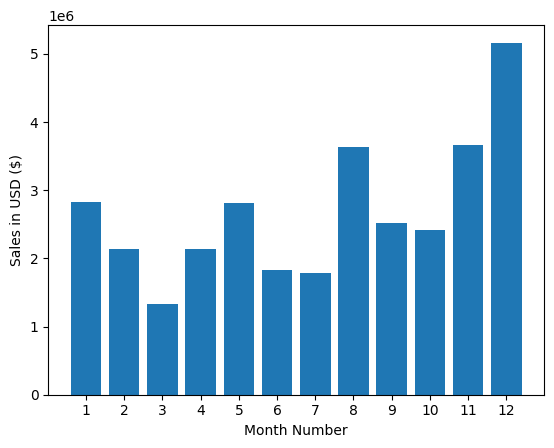

In [39]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

Question 2: What city had the highest number of sales?

In [40]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),15868,2630819.55,102514,2645966.46
Austin (TX),10529,1763876.90,68278,1774861.90
Boston (MA),20604,3413269.21,133538,3431386.59
Dallas (TX),15499,2483282.68,100097,2499097.67
Los Angeles (CA),31270,5206475.53,201984,5239238.14
New York City (NY),25818,4180932.32,167264,4206500.99
Portland (ME),2609,451606.66,16851,454306.97
Portland (OR),10290,1715327.59,66059,1724058.76
San Francisco (CA),47003,7691591.88,305872,7744008.35


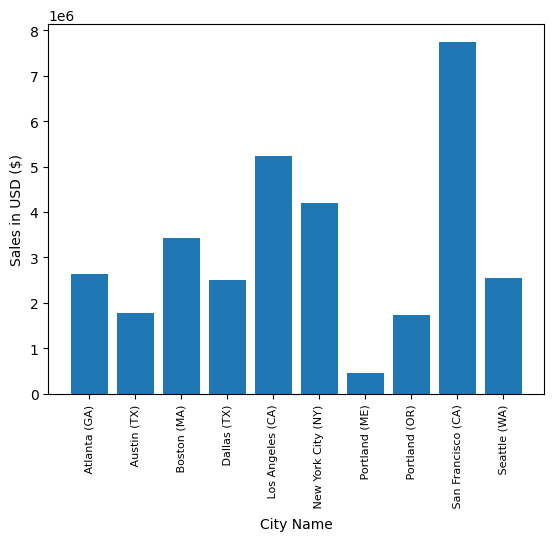

In [41]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical',size =8 )
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

Question 3: What time should we display advertisments to maximize likelihood of customer's buying product?

In [42]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [43]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute


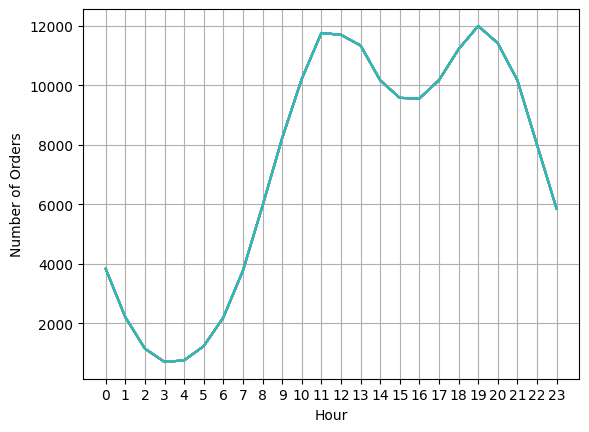

In [44]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendations is around 11am (11) 0r 7pm (19)

Qyestion 4: What products are most often sold together?

In [45]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

C:\Users\DNSHAH\AppData\Local\Temp\ipykernel_36936\2133653919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,173319,"Lightning Charging Cable,AA Batteries (4-pack)"
18,173334,"Apple Airpods Headphones,Bose SoundSport Headp..."
20,173335,"Google Phone,USB-C Charging Cable"
54,173368,"Vareebadd Phone,USB-C Charging Cable"
61,173374,"iPhone,Wired Headphones"


In [46]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

#print(count)

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 946
('Google Phone', 'USB-C Charging Cable') 894
('iPhone', 'Wired Headphones') 433
('Google Phone', 'Wired Headphones') 396
('iPhone', 'Apple Airpods Headphones') 334
('Vareebadd Phone', 'USB-C Charging Cable') 302
('Google Phone', 'Bose SoundSport Headphones') 229
('Vareebadd Phone', 'Wired Headphones') 136
('USB-C Charging Cable', 'Wired Headphones') 127
('Lightning Charging Cable', 'Wired Headphones') 91


Question 5: What product sold the most?Why do you think it sold the most?

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,173317,USB-C Charging Cable,1,11.95,2022-04-06 13:23:00,"554 Hickory St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,23
1,173318,27in FHD Monitor,1,149.99,2022-04-20 10:23:00,"59 7th St, Seattle, WA 98101",4,149.99,Seattle (WA),10,23
2,173319,Lightning Charging Cable,2,14.95,2022-04-25 00:15:00,"597 Walnut St, New York City, NY 10001",4,29.90,New York City (NY),0,15
3,173319,AA Batteries (4-pack),1,3.84,2022-04-25 00:15:00,"597 Walnut St, New York City, NY 10001",4,3.84,New York City (NY),0,15
4,173320,AA Batteries (4-pack),1,3.84,2022-04-28 20:36:00,"678 South St, Boston, MA 02215",4,3.84,Boston (MA),20,36


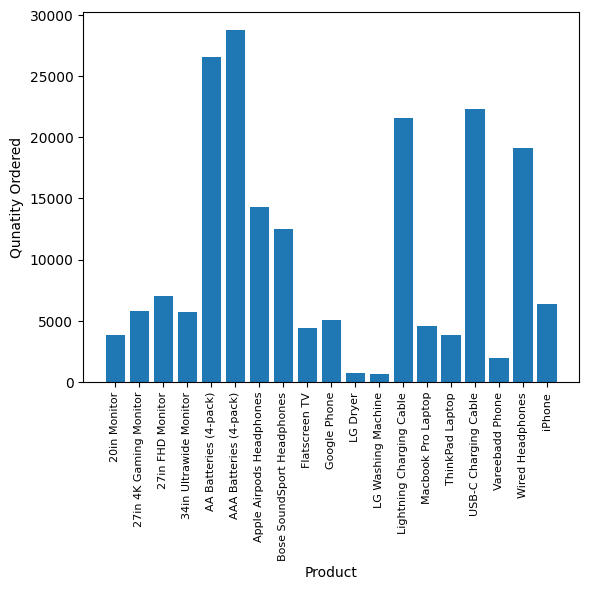

In [48]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Qunatity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

C:\Users\DNSHAH\AppData\Local\Temp\ipykernel_36936\392317265.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


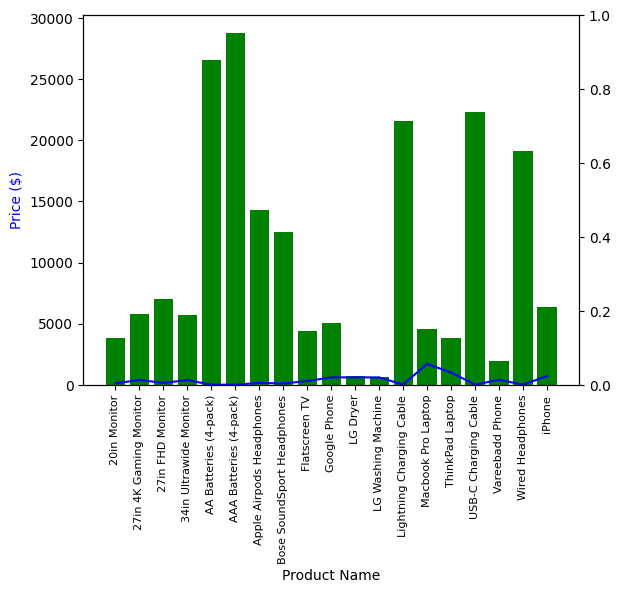

In [49]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color='g')
ax1.plot(products,prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()